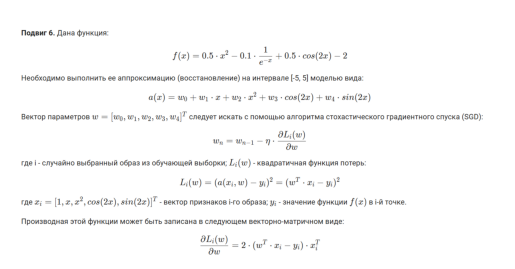

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/2_2_1.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

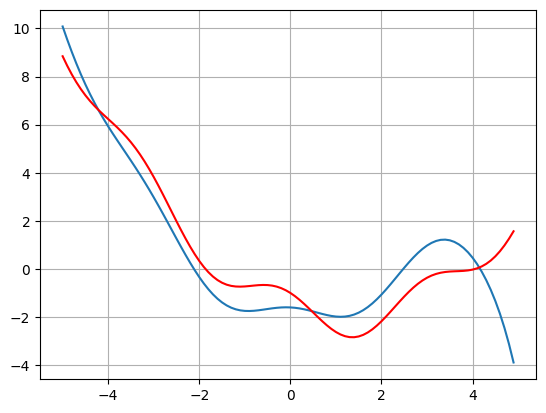

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.


# здесь объявляйте необходимые функции


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего


plt.ion()
fig, fx = plt.subplots()
fx.grid(True)
fx.plot(coord_x, coord_y)
X = np.array(np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x]))
approx = fx.plot(coord_x, X @ w.T, c="red")[0]

Qe = np.mean((X @ w.T - coord_y) ** 2)# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
for _ in range(N):
    k = np.random.randint(0, sz-1)
    y_pred = X[k] @ w.T
    w -= eta * 2 * ((y_pred - coord_y[k]) * X[k])
    Qe = lm * ((y_pred - coord_y[k]) ** 2) + (1 - lm) * Qe
    approx.set_ydata(X @ w.T)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

Q = np.square(X @ w.T - coord_y).mean()